# 📊 Problem 1: Exploring the Central Limit Theorem (CLT) through Simulations

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">🔍 Visualizing the Central Limit Theorem in Action</h2>
</div>

---

## 🎯 Motivation

The **Central Limit Theorem (CLT)** states that as the sample size $n$ increases, the sampling distribution of the sample mean $\bar{x}$ becomes approximately normal, regardless of the shape of the population distribution — provided the population has finite variance.

This simulation demonstrates CLT using:
- **Uniform Distribution**
- **Exponential Distribution**
- **Binomial Distribution**

---

## 🧪 Simulation Procedure

For each distribution:
1. Generate a large synthetic **population**.
2. For various sample sizes ($n = 5, 10, 30, 50$):
   - Take multiple random samples.
   - Compute the **sample means**.
   - Plot a histogram of the sample means to visualize the **sampling distribution**.

---

## 🔄 Sample Sizes and Repetitions

- Sample sizes: $n = 5$, $10$, $30$, $50$
- Repetitions per sample size: $1000$
- Population size: $100000$

---

## 📈 Visual Results

The histograms below demonstrate how the sampling distributions **approach normality** as $n$ increases — even when the population distribution is skewed or discrete.

This reinforces the power and generality of the CLT.

---

## 🌍 Real-World Applications

- 📏 Estimating population means in surveys and experiments  
- 🏭 Quality control in industrial production  
- 📊 Risk modeling and forecasting in finance  
- 🧠 Hypothesis testing and confidence intervals in statistics

---

## 🧠 Key Insight

> The Central Limit Theorem makes normal distribution the foundation of statistical inference — even when the population isn’t normal.


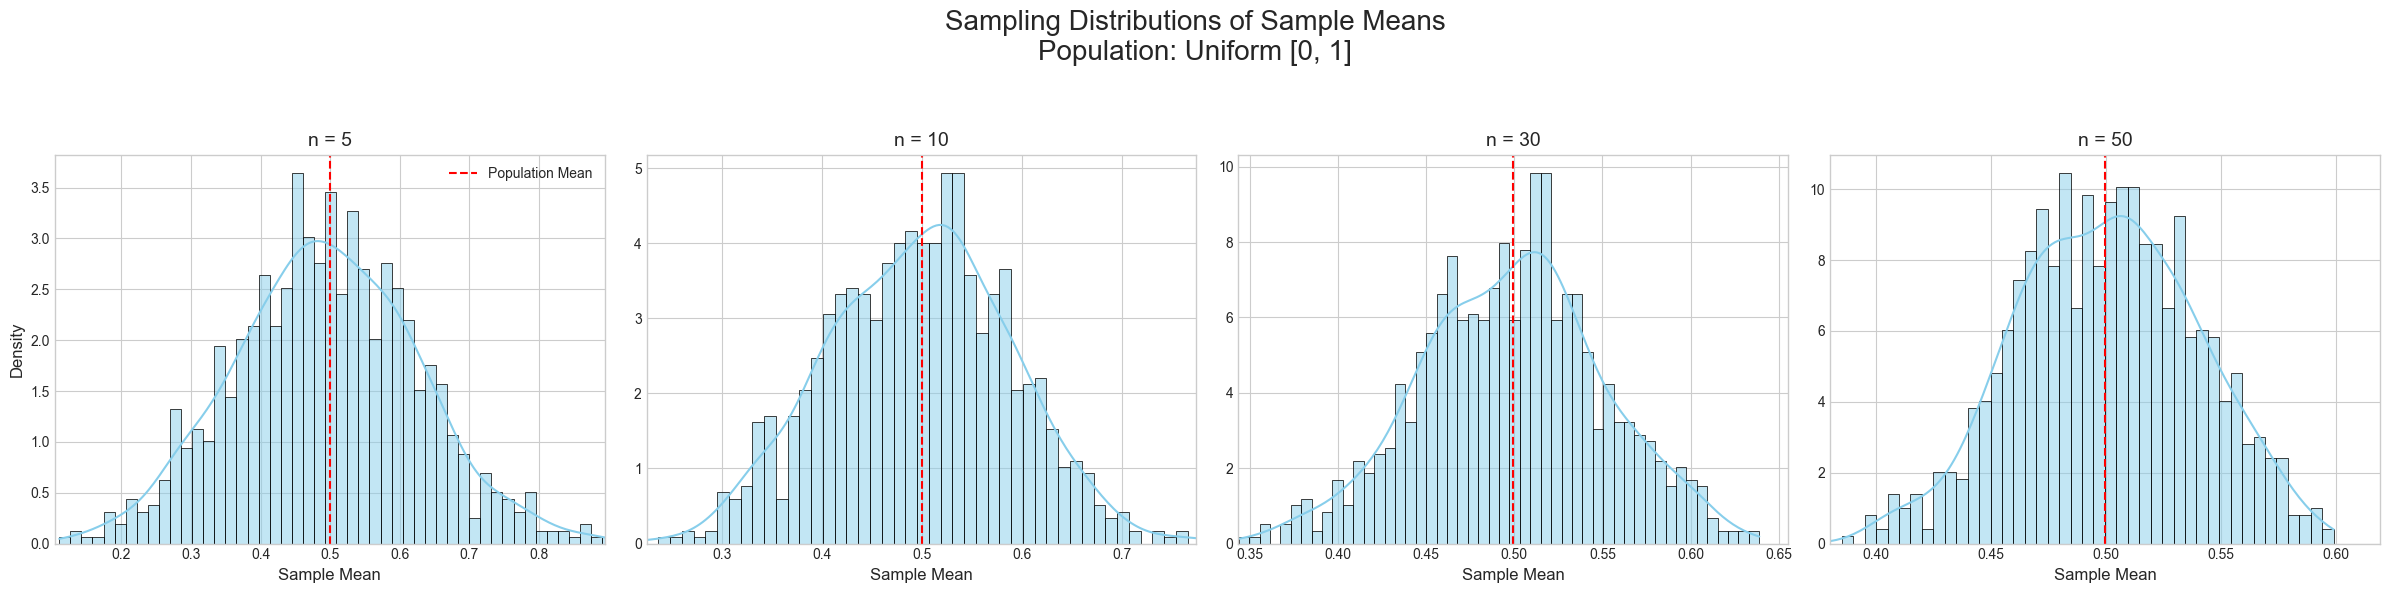

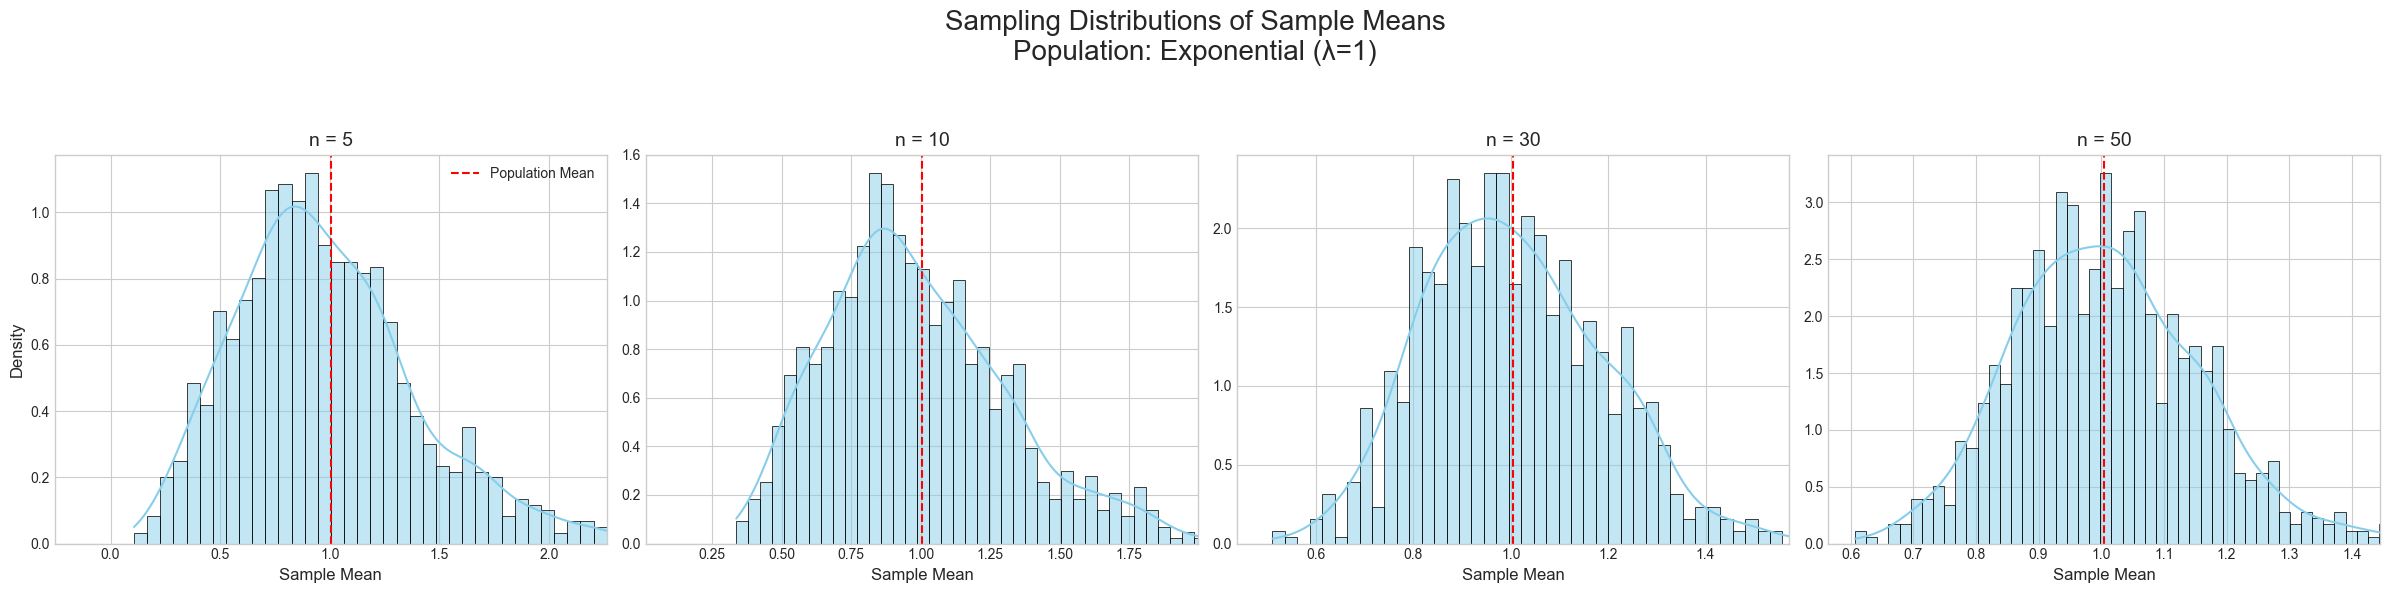

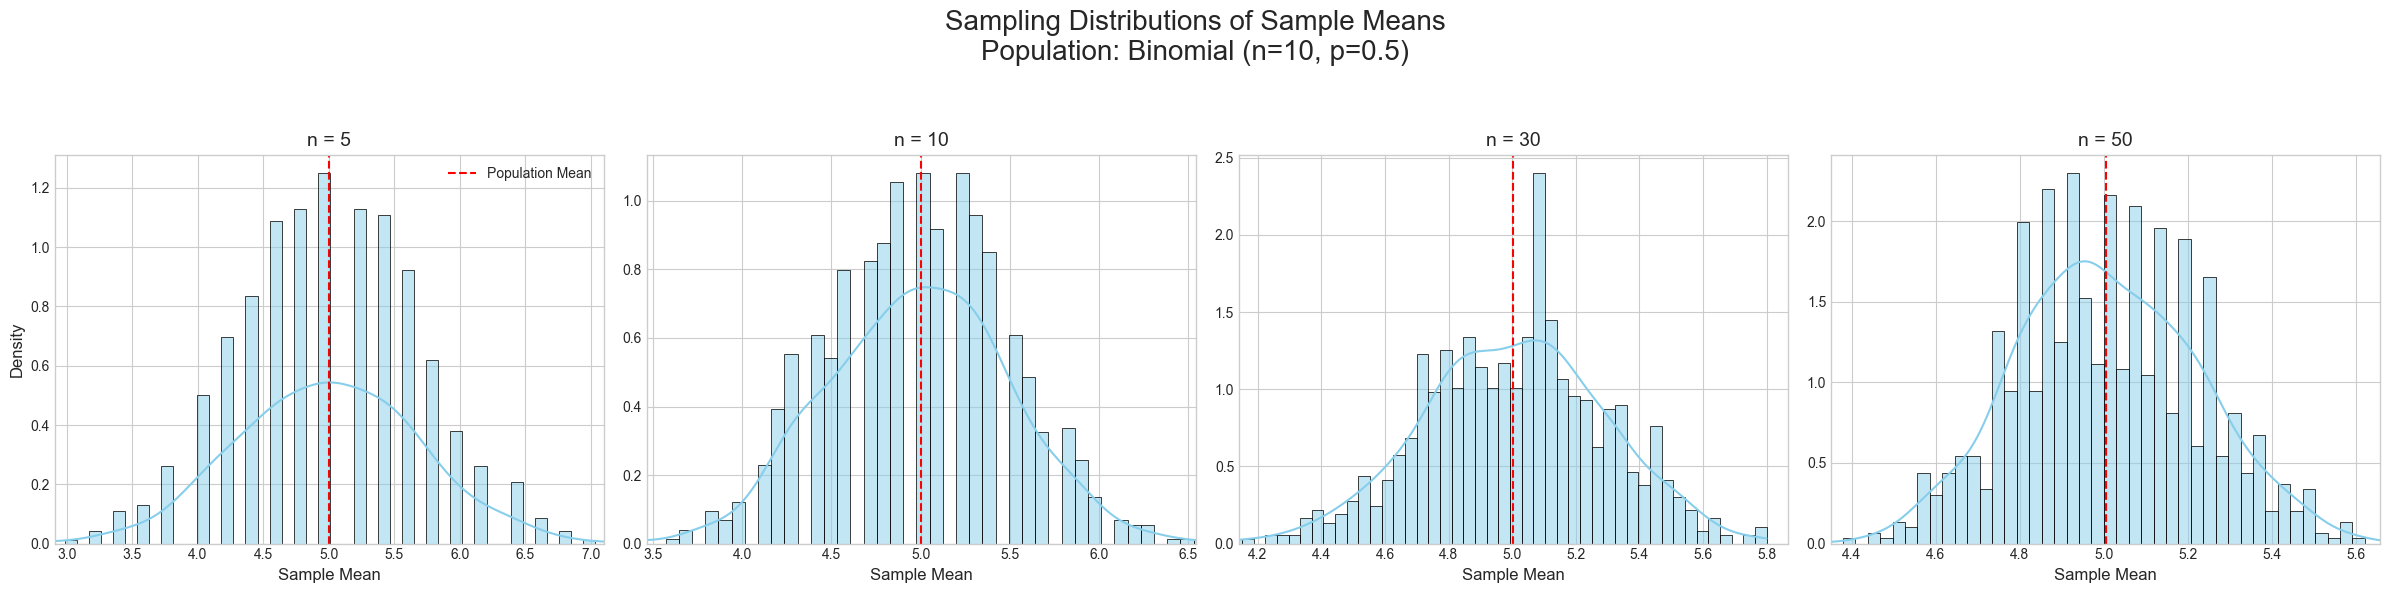

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
np.random.seed(42)
pop_size = 100000
num_samples = 1000
sample_sizes = [5, 10, 30, 50]

# Plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Distributions to test
distributions = {
    'Uniform [0, 1]': np.random.uniform(0, 1, pop_size),
    'Exponential (λ=1)': np.random.exponential(scale=1.0, size=pop_size),
    'Binomial (n=10, p=0.5)': np.random.binomial(n=10, p=0.5, size=pop_size)
}

# Loop through each distribution
for name, population in distributions.items():
    fig, axes = plt.subplots(1, len(sample_sizes), figsize=(24, 6))  # BIGGER plot area
    fig.suptitle(f'Sampling Distributions of Sample Means\nPopulation: {name}', fontsize=20)

    for i, n in enumerate(sample_sizes):
        sample_means = [np.mean(np.random.choice(population, size=n)) for _ in range(num_samples)]

        ax = axes[i]
        sns.histplot(sample_means, kde=True, stat="density", bins=50, ax=ax, color='skyblue', edgecolor='black')

        # Formatting
        ax.set_title(f'n = {n}', fontsize=14)
        ax.set_xlabel('Sample Mean', fontsize=12)
        if i == 0:
            ax.set_ylabel('Density', fontsize=12)
        else:
            ax.set_ylabel('')

        # Zoom and details
        pop_mean = np.mean(population)
        std_sample = np.std(sample_means)
        ax.set_xlim(pop_mean - 3 * std_sample, pop_mean + 3 * std_sample)
        ax.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
        if i == 0:
            ax.legend(fontsize=10)

        ax.tick_params(labelsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()
